# Лабораторная работа №1
## Выполнил Ишков Д. Группа ИУ5-24М 2021г
## Задание:
Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь. Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:

* История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
* На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
* Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
* Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
* История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

### Шаг 0. Импорты и описание датасета

In [1]:
# импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from umap import UMAP
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_auc_score, f1_score, auc
%matplotlib inline

In [2]:
# чтение
df = pd.read_csv('train.zip', index_col=0)
df_test = pd.read_csv('test.zip', index_col=0)

### Airline Passenger Satisfaction
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

__Gender__: Gender of the passengers (Female, Male)

__Customer Type__: The customer type (Loyal customer, disloyal customer)

__Age__: The actual age of the passengers

__Type of Travel__: Purpose of the flight of the passengers (Personal Travel, Business Travel)

__Class__: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

__Flight distance__: The flight distance of this journey

__Inflight wifi service__: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

__Departure/Arrival time convenient__: Satisfaction level of Departure/Arrival time convenient

__Ease of Online booking__: Satisfaction level of online booking

__Gate location__: Satisfaction level of Gate location

__Food and drink__: Satisfaction level of Food and drink

__Online boarding__: Satisfaction level of online boarding

__Seat comfort__: Satisfaction level of Seat comfort

__Inflight entertainment__: Satisfaction level of inflight entertainment

__On-board service__: Satisfaction level of On-board service

__Leg room service__: Satisfaction level of Leg room service

__Baggage handling__: Satisfaction level of baggage handling

__Check-in service__: Satisfaction level of Check-in service

__Inflight service__: Satisfaction level of inflight service

__Cleanliness__: Satisfaction level of Cleanliness

__Departure Delay in Minutes__: Minutes delayed when departure

__Arrival Delay in Minutes__: Minutes delayed when Arrival

__Satisfaction__: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [3]:
# срез данных
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# информация о столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64
Inflight entertainment               103904 non-null int64


__Как можно увидеть, пропусков нет__

In [5]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


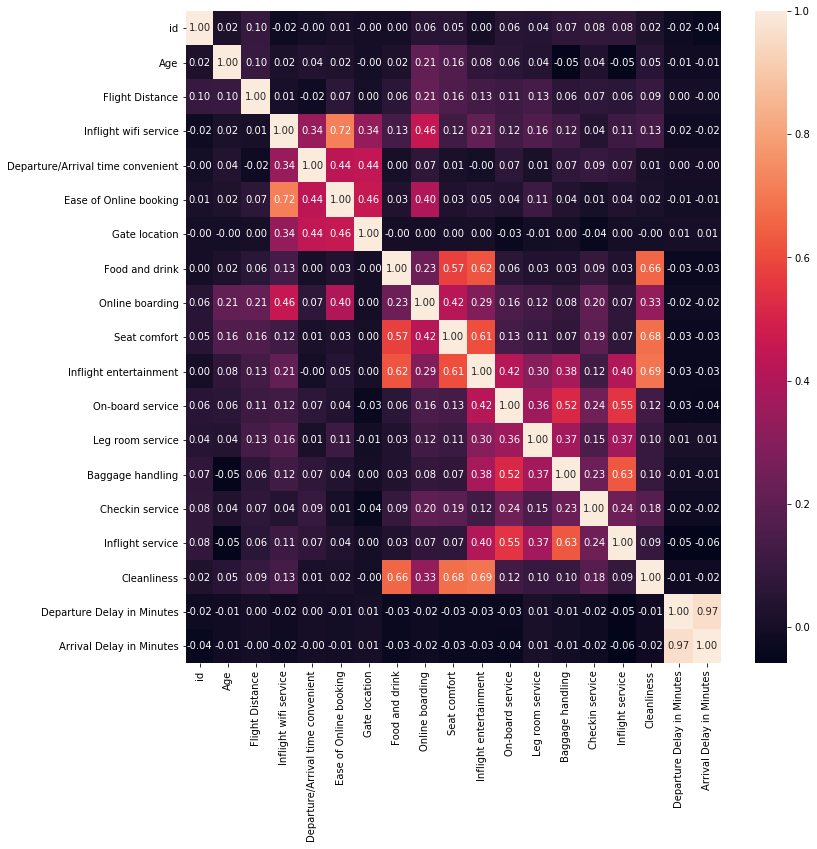

In [6]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

__Переименуем столбцы для более удобной работы с ними__

In [7]:
coltype = {}
df.columns = [col.lower().replace(' ', '_').replace('-', '') for col in df.columns]
df.columns = [col if col not in ['id', 'class'] else col+'_' for col in df.columns]
df_test.columns = df.columns
for col in df.columns:
    coltype[col] = 'cat'
for col in ['age', 'flight_distance',
            'departure_delay_in_minutes', 'arrival_delay_in_minutes']:
    coltype[col] = 'numeric'
df.columns

Index(['id_', 'gender', 'customer_type', 'age', 'type_of_travel', 'class_',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

## Шаг 1. Влияние класса на дальность поездки

__Сгруппируем по типу класса__

In [8]:
df.groupby('class_').flight_distance.agg('mean')

class_
Business    1675.976925
Eco          743.439748
Eco Plus     747.125567
Name: flight_distance, dtype: float64

__Eco и Eco Plus очень похожи по среднему значению__

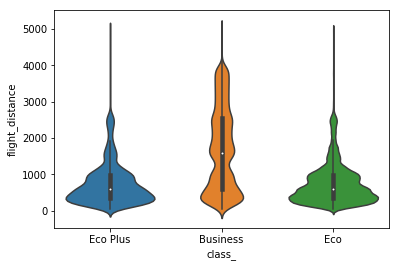

In [9]:
sns.violinplot(df.class_, df.flight_distance)

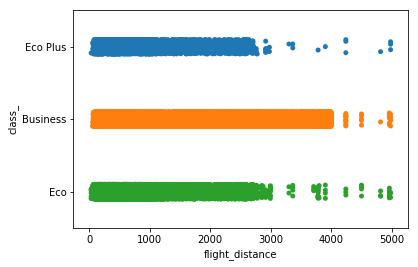

In [10]:
sns.stripplot(df.flight_distance, df.class_)

__Eco и Eco Plus очень похожи по распределению => их можно объединить в одну группу__

Text(0.5,1,'График размаха дальности перелёта в зависимости от класса')

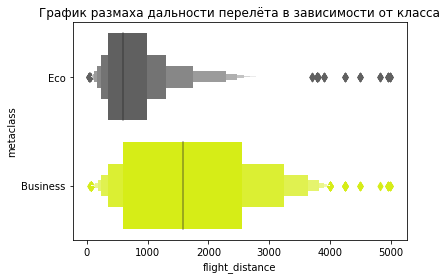

In [11]:
df['metaclass'] = df.class_.str.split(' ').apply(lambda x: x[0])
sns.boxenplot(x=df.flight_distance, y=df.metaclass,
            palette=['#606060FF', '#D6ED17FF'],
            saturation=2,
            linewidth=1.,
            )
plt.title('График размаха дальности перелёта в зависимости от класса')

__Итоги__: Диаграмма размаха, совмещенная с гистограммой, для эконом и бизнес классов.

Группы расположены горизонтально, чтобы легче сравнивать.
Бизнес-класс выделен ярким цветом.

## Шаг 2. Как влияет возраст пассажира на оценку

__Введём новую переменную `total_score`, являющуюся суммой оценок за все сервисы__

bins: 8


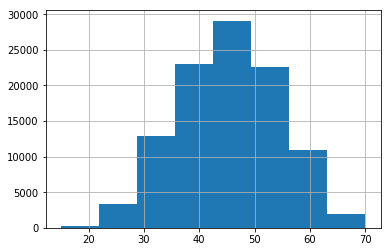

In [12]:
score_cols = ['inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness']
df['total_score'] = 0
coltype['total_score'] = 'numeric'
for col in score_cols:
    df.total_score += df[col]
bins = int(1+np.sqrt(df.total_score.max() - df.total_score.min()))
print('bins:' , bins)
df.total_score.hist(bins=bins)

__По гистограмме оценки имеют нормальное распределение, но рисунок неинформативный__

Text(0.5,1,'График размаха зависимости средней оценки от возраста')

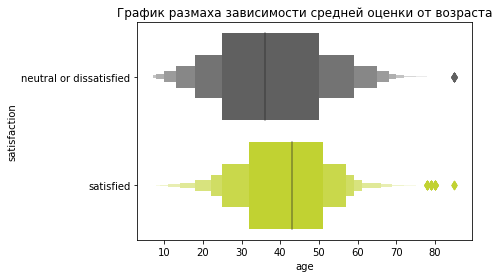

In [13]:
sns.boxenplot(df.age, df.satisfaction, palette=['#606060FF', '#D6ED17FF'])
plt.title('График размаха зависимости средней оценки от возраста')

__По диаграмме размаха видно, что возраст влияет на оценку, распределения не одинаковые__

__Характер воздействия не ясен__

__Найдём максимально различимые возрастные группы с помощью дерева решений__ 

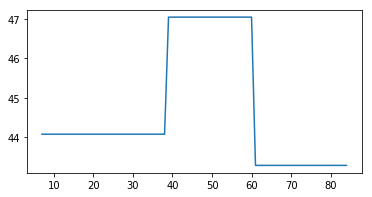

In [14]:
rf = DecisionTreeRegressor(max_depth=2, random_state=69,
                          min_impurity_decrease=0.2).fit(df.age.values.reshape(-1, 1),
                                                         df.total_score)
fig, ax = plt.subplots(figsize=(6, 3))
ages = np.arange(df.age.min(), df.age.max())
ax.plot(ages, rf.predict(ages.reshape(-1, 1)))

__Из граффика видны три группы, нужно перепроверить, насколько это совпадает с действительностью__

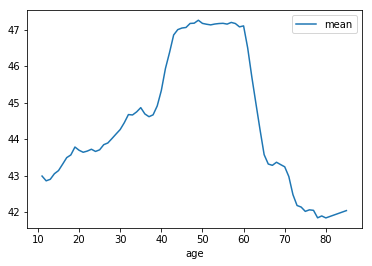

In [15]:
df.groupby('age').total_score.agg(['mean']).rolling(5).mean().plot()

__Из граффика оконного среднего также видны три группы, причём второй отрезок подозрительно стабильный__

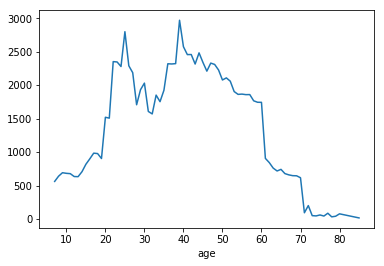

In [16]:
df.groupby('age').id_.agg('count').plot()

__Проверили на наличие дубликатов и сфабрикованности записей в диапазоне 40-60 лет.__

Text(0.5,1,'Зависимость средней суммарной оценки пассажира от его возраста')

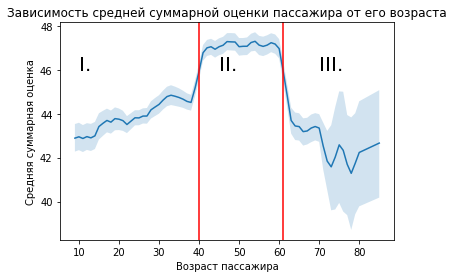

In [17]:
def bootstrap(group, level=25):
    means = []
    for i in range(1000):
        means.append(np.mean(np.random.choice(group, size=group.size)))
    return np.percentile(means, level)

grouped = df.groupby('age').total_score
mean = grouped.agg('mean').rolling(3).mean().reset_index()
p25 = grouped.agg(lambda x: bootstrap(x, 2.5)).rolling(3).mean().reset_index()
p75 = grouped.agg(lambda x: bootstrap(x, 97.5)).rolling(3).mean().reset_index()

mean.columns = ['age', 'v']
p25.columns = ['age', 'v']
p75.columns = ['age', 'v']

plt.plot(p25.age, mean.v)
plt.fill_between(p25.age, p25.v,
                 p75.v,alpha=0.2)
plt.axvline(x=40, color='red')
plt.axvline(x=61, color='red')
plt.text(10, 46, 'I.', fontsize=20)
plt.text(45, 46, 'II.', fontsize=20)
plt.text(70, 46, 'III.', fontsize=20)
plt.xlabel('Возраст пассажира')
plt.ylabel('Средняя суммарная оценка')
plt.title('Зависимость средней суммарной оценки пассажира от его возраста')

__Построили график для суммарной оценки с 95% доверительным интервалом. Видны три участка.__

Text(0.5,1,'Зависимость вероятности удовлетворения поездкой пассажира от его возраста')

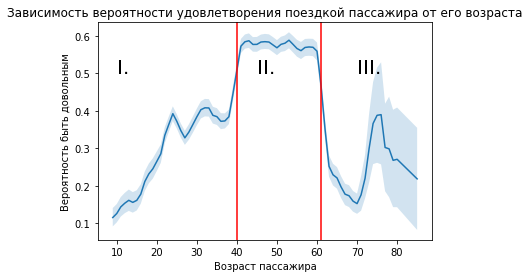

In [18]:
grouped = df.groupby('age').satisfaction
mean = grouped.agg(lambda x: np.mean(x=='satisfied')).rolling(3).mean().reset_index()
p25 = grouped.agg(lambda x: bootstrap(x=='satisfied', 2.5)).rolling(3).mean().reset_index()
p75 = grouped.agg(lambda x: bootstrap(x=='satisfied', 97.5)).rolling(3).mean().reset_index()

mean.columns = ['age', 'v']
p25.columns = ['age', 'v']
p75.columns = ['age', 'v']

plt.plot(p25.age, mean.v)
plt.fill_between(p25.age, p25.v,
                 p75.v,alpha=0.2)
plt.axvline(x=40, color='red')
plt.axvline(x=61, color='red')
plt.text(10, .50, 'I.', fontsize=20)
plt.text(45, .50, 'II.', fontsize=20)
plt.text(70, .50, 'III.', fontsize=20)
plt.xlabel('Возраст пассажира')
plt.ylabel('Вероятность быть довольным')
plt.title('Зависимость вероятности удовлетворения поездкой пассажира от его возраста')

__Построили такой же график для целевой переменной с 95% доверительным интервалом. Тут тоже видны три участка.__

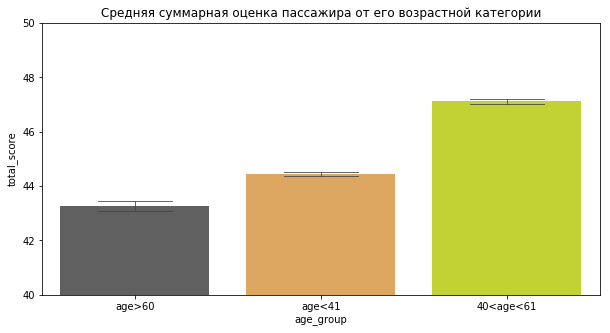

Text(0.5,1,'Вероятность удовлетворённости пассажира от его возрастной категории')

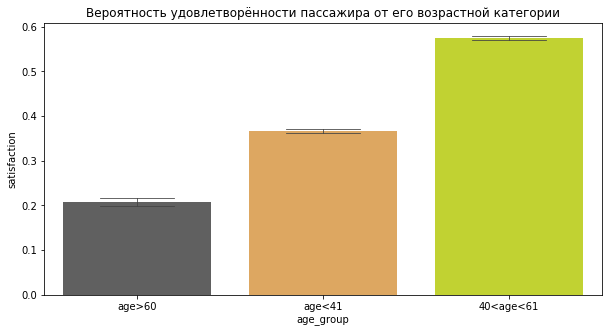

In [19]:
groups = ['age>60', 'age<41', '40<age<61', ]
df['age_group'] = groups[1]
df.loc[df.age>41, 'age_group'] = groups[-1]
df.loc[df.age>60, 'age_group'] = groups[0]
coltype['age_group'] = 'cat'
plt.figure(figsize=(10, 5))
ax = sns.barplot(df.age_group, df.total_score, order=groups, ci=95,
                 capsize=0.4, errwidth=0.8,
                 palette=['#606060FF', '#F2AA4CFF', '#D6ED17FF'])
ax.set_ylim(40, 50)
plt.title('Средняя суммарная оценка пассажира от его возрастной категории')
plt.show()
plt.figure(figsize=(10, 5))
ax = sns.barplot(df.age_group, df.satisfaction=='satisfied', order=groups, ci=95,
                 capsize=0.4, errwidth=0.8,
                 palette=['#606060FF', '#F2AA4CFF', '#D6ED17FF'])
plt.title('Вероятность удовлетворённости пассажира от его возрастной категории')

__Итог:__
В датасете можно выделить три информативные возрастные группы.

* Пожилые (старше 60 лет) остаются удовлетворёнными только в ~20% случаев;
* Молодые (младше 40 лет) остаются удовлетворёнными только в ~35% случаев;
* Среднего (от 40 лет до 60 лет) остаются удовлетворёнными чаще всего, в ~60% случаев. Хотя тут возможна сфабрикованность данных, уж слишком стабильна по оценкам эта возрастная категория.

## Шаг 3. Надо или не надо обрезать столбчатые диаграммы?

__Пример спекуляции путём обрезки вертикальной оси:__

Хотя реальная разница между столбцами всего 3%, По такому графику можно предположить, что женщины летают на порядок чаще мужчин.

Также стоит учесть, что это собранные данные, а не генеральная совокупность, и имеет место систематическая ошибка выборки.

(51077, 52827)

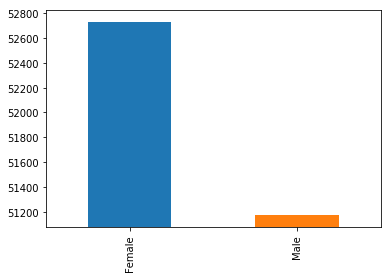

In [20]:
ax = df.gender.value_counts().plot(kind='bar')
ax.set_ylim(df.gender.value_counts().min()-100, df.gender.value_counts().max()+100)

__Реальная картина__

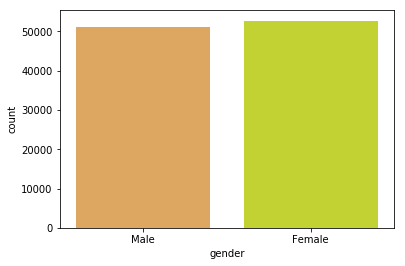

In [21]:
ax = sns.countplot(df.gender, palette=['#F2AA4CFF', '#D6ED17FF', '#606060FF'])

__Аналогичный пример, но c удовлетворённостью в зависимости от пола.__

Непересекающиеся 95% доверительные интервалы свидетельствует о статистически значимых различиях,
но насколько велики эти различия?

Диаграмма может ввести в заблуждение, так как сложится впечатление, что чуть ли не в два раза разница.

При этом по вертикальной оси разница составляет 1.5%

(0.42, 0.45)

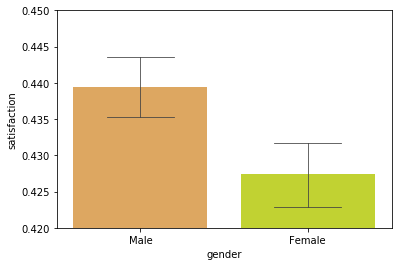

In [22]:
ax = sns.barplot(df.gender, df.satisfaction=='satisfied', ci=95,
                 capsize=0.4, errwidth=0.8,
                 palette=['#F2AA4CFF', '#D6ED17FF', '#606060FF'])
ax.set_ylim(0.42, 0.45)

__Аналогичный пример, но c пропорцией бизнес-поездок в зависимости от пола.__

Может сложиться впечатления, что бизнес-леди больше бизнесменов.

Доверительные интервалы пересекаются, значит различия не статистически значимые.

При этом по вертикальной оси разница составляет 1.2%

(0.495, 0.52)

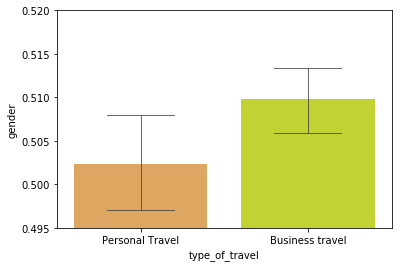

In [23]:
ax = sns.barplot(df.type_of_travel, df.gender=='Female', ci=95,
            capsize=0.4, errwidth=0.8,
            palette=['#F2AA4CFF', '#D6ED17FF', '#606060FF'])
ax.set_ylim(0.495, 0.52)

__Хорошие примеры__

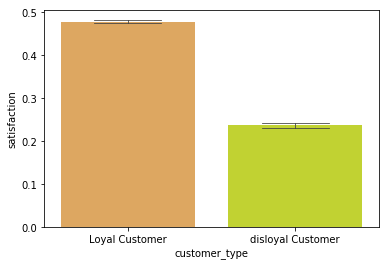

In [24]:
sns.barplot(df.customer_type, df.satisfaction=='satisfied', ci=95,
            capsize=0.4, errwidth=0.8,
            palette=['#F2AA4CFF', '#D6ED17FF', '#606060FF'])

__Хорошие примеры__

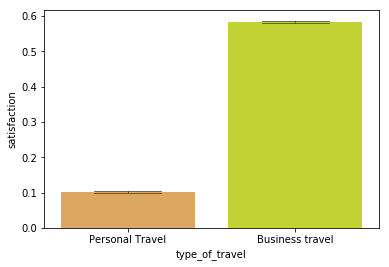

In [25]:
sns.barplot(df.type_of_travel, df.satisfaction=='satisfied', ci=95,
            capsize=0.4, errwidth=0.8,
            palette=['#F2AA4CFF', '#D6ED17FF', '#606060FF'])

__Можно составить декартвое произведение и отразить 2 диаграммы как одну__

Text(0.5,1,'Вероятность удовлетворенности клиента в зависимости от его лояльности и типа поездки')

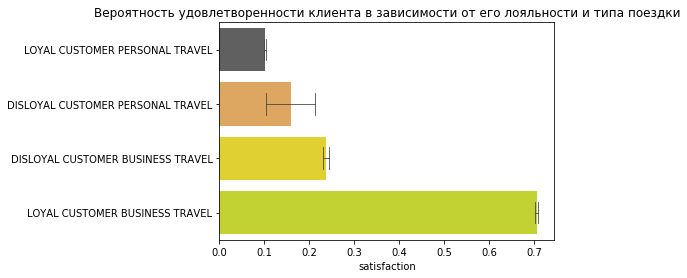

In [26]:
sns.barplot(df.satisfaction=='satisfied',
            (df.customer_type + ' ' + df.type_of_travel).str.upper(),
            ci=95,
            capsize=0.4, errwidth=0.8,
            order=['LOYAL CUSTOMER PERSONAL TRAVEL',
                   'DISLOYAL CUSTOMER PERSONAL TRAVEL',
                   'DISLOYAL CUSTOMER BUSINESS TRAVEL',
                   'LOYAL CUSTOMER BUSINESS TRAVEL'],
            palette=['#606060FF', '#F2AA4CFF', '#FEE715FF', '#D6ED17FF'])
plt.title('Вероятность удовлетворенности клиента в зависимости '
          'от его лояльности и типа поездки')

__Итог:__
Надо с большой осторожностью обрезать оси.

Последняя диграмма была отсортирована, расположена горизонтально, зеленым цветом выделена доброжелательная группа - лояльные клиенты, цель поездки - бизнес.


Из этой диаграммы можно формировать конкретные стратегии для каждой целевой группы, чтобы повысить общую удовлетворённость (задача Uplift).

## Шаг 4. Визуализация кластеров и факторы

__Преобразование категориальных данных__

In [27]:
preprocess = []
features = []
for col in df.columns[1:-4].tolist()+['age_group']:
    if df[col].dtype=='O':
        print(col)
        preprocess.append(pd.get_dummies(df[col], drop_first=True).values)
        features.extend((col+pd.get_dummies(df[col],
                                            drop_first=True).columns.astype(str)).tolist())
    else:
        try:
            int(df[col].values.reshape(-1, 1).min())
        except ValueError:
            df[col] = df[col].fillna(0)
            print(col)
        if coltype[col] == 'numeric':
            preprocess.append(df[col].values.reshape(-1, 1))
            features.append(col)
        else:
            # categorical
            if np.unique(df[col].values).size == 0:
                # rating
                preprocess.append((df[col] < 3).values.reshape(-1, 1))
                preprocess.append((df[col] > 3).values.reshape(-1, 1))
            else:
                preprocess.append(pd.get_dummies(df[col], drop_first=True).values)
                features.extend((col+pd.get_dummies(df[col],
                                                    drop_first=True).columns.astype(str)).tolist())
preprocess = np.hstack(preprocess)

gender
customer_type
type_of_travel
class_
arrival_delay_in_minutes
age_group


__Визуализация 3 факторов__

Text(0.05,0.95,'Проекция в 3д')

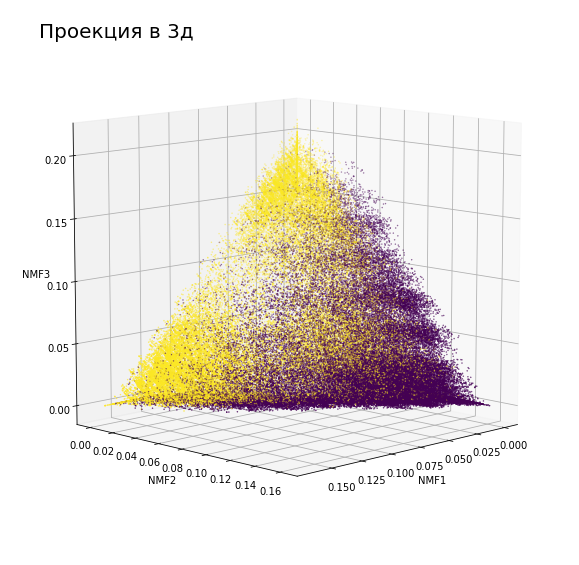

In [28]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
nmf = NMF(random_state=69, n_components=3).fit(
    MinMaxScaler().fit_transform(preprocess))
nmf_values = nmf.transform(MinMaxScaler().fit_transform(preprocess))
ax.scatter(nmf_values[:, 0], nmf_values[:, 1], nmf_values[:, 2],
           s=0.2, c=(df.satisfaction=='satisfied'))
ax.view_init(elev=10., azim=45)
ax.set_xlabel('NMF1')
ax.set_ylabel('NMF2')
ax.set_zlabel('NMF3')
ax.text2D(0.05, 0.95, 'Проекция в 3д', fontsize=20, transform=ax.transAxes)

__Из диаграммы рассеивания видно, что два фактора из трёх связаны с удовлетворённостью пассажира.__
__Попробуем свести все к одной переменной__

In [29]:
top25_features = np.argsort(nmf.components_[0]+nmf.components_[2]-nmf.components_[1])[:-25:-1]
# cамые важные признаки
set(map(lambda col: ''.join(filter(lambda x: not x.isdigit(), col)), np.array(features)[top25_features]))

{'age',
 'baggage_handling',
 'checkin_service',
 'cleanliness',
 'ease_of_online_booking',
 'flight_distance',
 'food_and_drink',
 'inflight_entertainment',
 'inflight_service',
 'inflight_wifi_service',
 'leg_room_service',
 'onboard_service',
 'online_boarding',
 'seat_comfort'}

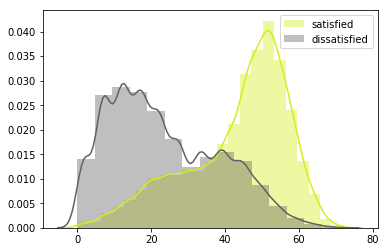

In [30]:
nmf_comp = (nmf.components_[0]+nmf.components_[2]-nmf.components_[1])[top25_features]
nmf_data = (MinMaxScaler().fit_transform(preprocess[:, top25_features]).\
                           dot(nmf_comp))
sns.distplot(nmf_data[df.satisfaction=='satisfied'], bins=23, color='#D6ED17FF', label='satisfied')
sns.distplot(nmf_data[df.satisfaction!='satisfied'], bins=15, color='#606060FF', label='dissatisfied')
plt.legend()

__Новая переменная позволяет разделить пассажиров с помощью линейной комбинации из 14 признаков, что видно из графика__

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=True, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=True, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=8, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=69, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Fri Feb 12 18:47:24 2021 Finding Nearest Neighbors
Fri Feb 12 18:47:24 2021 Building RP forest with 21 trees
Fri Feb 12 18:47:35 2021 NN descent for 17 iterations
	 0  /  17
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	 7  /  17
	 8  /  17
Fri Feb 12 18:48:07 2021 Finished Nearest Neighbor Search
Fri Feb 12 18:48:15 2021 Constru

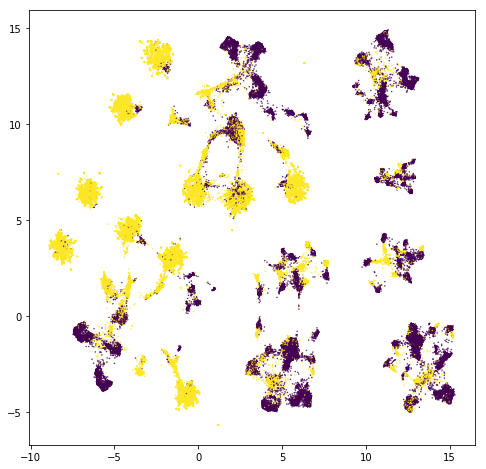

In [31]:
umap = UMAP(n_components=2, random_state=69,
            n_neighbors=8,
            force_approximation_algorithm=True,
            verbose=True,
            metric='euclidean',
            low_memory=True).fit(MinMaxScaler().fit_transform(preprocess))
umap_values = umap.transform(MinMaxScaler().fit_transform(preprocess))
plt.figure(figsize=(8, 8))
plt.scatter(umap_values[:, 0], umap_values[:, 1], s=0.2, c=(df.satisfaction=='satisfied'))

Text(0.5,1,'Проекция в 2д')

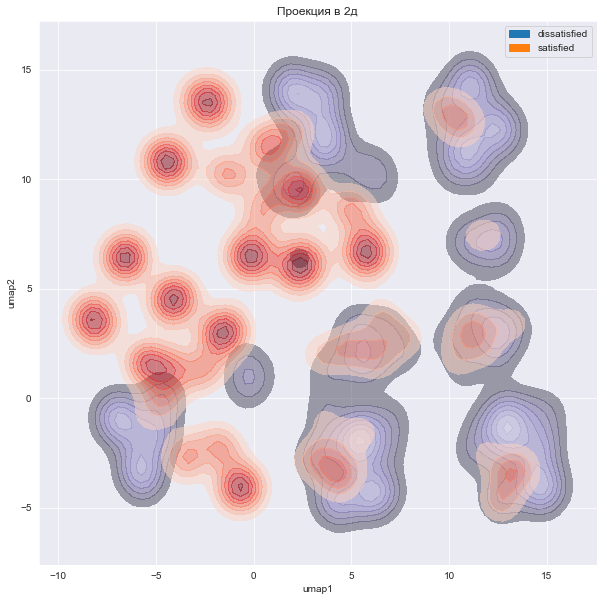

In [32]:
plt.figure(figsize=(10, 10))
umap_df = pd.DataFrame(umap_values)
umap_df.columns = ['umap1', 'umap2']
sns.set_style('darkgrid')
sns.kdeplot(umap_df[(df.satisfaction!='satisfied')==1].umap1, 
            umap_df[(df.satisfaction!='satisfied')==1].umap2,
            gridsize=75, shade_lowest=False, label='dissatisfied',
            shade=True, cmap="Purples_d", alpha=0.5)
sns.kdeplot(umap_df[(df.satisfaction=='satisfied')==1].umap1, 
            umap_df[(df.satisfaction=='satisfied')==1].umap2,
            gridsize=75, shade_lowest=False, label='satisfied',
            shade=True, cmap="Reds", alpha=0.5)
plt.legend(markerscale=15)
plt.title('Проекция в 2д')

__Итог__: Нашли информативные признаки, визуализировали кластеры на 2д плоскости.

Были найдены следующие информативные признаки с помощью анализа факторов:
 * age;
 * baggage_handling;
 * checkin_service;
 * cleanliness;
 * ease_of_online_booking;
 * flight_distance;
 * food_and_drink;
 * inflight_entertainment;
 * inflight_service;
 * inflight_wifi_service;
 * leg_room_service;
 * onboard_service;
 * online_boarding;
 * seat_comfort.

С помощью алгоритма понижения размерности была получена 2д визуализация данных, на которых можно четко увидеть кластеры. При этом центры кластеров по оценке плотности с помощью ядер практически не перекрываются для удовлетворённых и неудовлетворённых пассажиров.

## Шаг 5. Проверка распределений обучаемой и тестовой выборок

__Довольно частой проблемой является несоответствие распределения данных между тестовой или валидационной выборки и обучающей.__

Несоотвтествие выборок напрямую влияет на подбор гиперпараметров модели.
Желательно, чтобы выборки совпадали.

Для проверки распределений введём новую колонку `tt`, где она будет 0 у обучающей и 1 у тестовой.
Если распределения одинаковы, то классификатор будет иметь такое же качество, как и случайное угадыванин.

In [33]:
df['tt'] = 0
df_test['tt'] = 1
subset = ['gender', 'customer_type', 'age', 'type_of_travel', 'class_',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'tt']
ddf = pd.concat([df_test[subset], df[subset]])
preprocess = []
for col in ddf.columns[:-1]:
    if ddf[col].dtype=='O':
        print(col)
        preprocess.append(pd.get_dummies(ddf[col], drop_first=True).values)
    else:
        try:
            int(ddf[col].values.reshape(-1, 1).min())
        except ValueError:
            ddf[col] = ddf[col].fillna(-1)
            print(col)
        #preprocess.append(pd.get_dummies(ddf[col], drop_first=True).values)
        preprocess.append(ddf[col].values.reshape(-1, 1))
preprocess = np.hstack(preprocess)

gender
customer_type
type_of_travel
class_
arrival_delay_in_minutes


__Делим объединённый датасет на новую обучающую и тестовую выборки и учим случайный лес.__

In [34]:
X_train, X_test, y_train, y_test = train_test_split(preprocess,
                                                    ddf[subset[-1]],
                                                    stratify=ddf[subset[-1]].tolist(),
                                                    random_state=69)
rf = RandomForestClassifier(random_state=69, verbose=True).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.0s finished


__Строим распределения для каждой из оригинальных выборок.__

__Считаем f1-меру, auc.__

__Строим кривую полнота-точность__

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


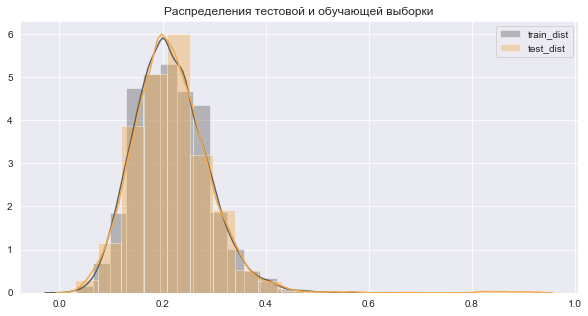

AUC is  0.5028666270701276
f1=0.010


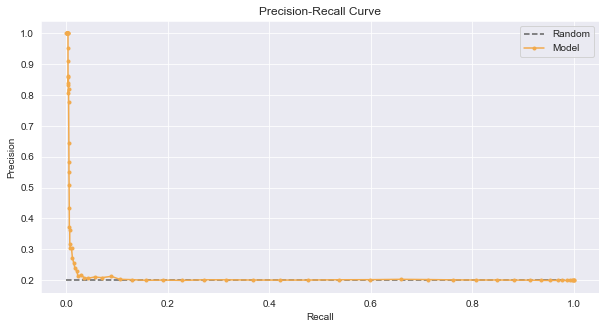

In [35]:
plt.figure(figsize=(10, 5))
lr_probs = rf.predict_proba(X_test)[:, 1]
yhat = rf.predict(X_test)
sns.distplot(lr_probs[y_test==0], bins=20, color='#606060FF', label='train_dist')
sns.distplot(lr_probs[y_test==1], bins=20, color='#F2AA4CFF', label='test_dist')
plt.legend()
plt.title('Распределения тестовой и обучающей выборки')
plt.show()
plt.figure(figsize=(10, 5))
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1 = f1_score(y_test, yhat)
# summarize scores
print('AUC is ', roc_auc_score(y_test, lr_probs))
print('f1=%.3f' % (lr_f1))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random', c='#606060FF')
plt.plot(lr_recall, lr_precision, marker='.', label='Model', c='#F2AA4CFF')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

__Итог__:

Анализ распределений показал, что обучающая и тестовая выборки совпадают с точностью до погрешности и они выбраны из одной генеральной совокупности.